<a href="https://colab.research.google.com/github/Ryo-yuu/Demo/blob/main/Class_6_Tutorial_Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA using Python

In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(1)

In [27]:
method_1 = np.random.normal(20,3,100)
method_2 = np.random.normal(10,3,100)
method_3 = np.random.normal(10,3,100)
method_4 = np.random.normal(10,3,100)

data = pd.DataFrame({'method_1':method_1,
                     'method_2':method_2,
                     'method_3':method_3,
                     'method_4':method_4})
data

,method_1,method_2,method_3,method_4
0,23.677936,15.508610,7.300102,6.500043
1,16.217946,10.231479,10.698988,9.363029
2,21.399924,11.134644,9.315399,7.872249
3,17.320440,4.929253,6.062206,6.653682
4,20.325702,11.873693,11.523695,4.384328
...,...,...,...,...
95,20.968398,7.875954,8.867498,12.527110
96,25.899668,15.135497,14.204023,6.046868
97,15.014750,9.196534,4.280986,9.024434
98,19.617887,12.258654,12.867318,10.603830


In [28]:
df = pd.melt(data,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
180,method_2,10.685506
22,method_1,18.668020
32,method_1,19.872040
395,method_4,12.527110
252,method_3,9.843340
113,method_2,6.663749
106,method_2,13.773387
69,method_1,19.328537
141,method_2,13.135872
54,method_1,16.984129


In [29]:
model = ols('value~C(treatment)', data=df).fit() #ols also use for renear regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     264.3
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           3.72e-94
Time:                        00:49:04   Log-Likelihood:                -1016.4
No. Observations:                 400   AIC:                             2041.
Df Residuals:                     396   BIC:                             2057.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.0296      0.309     64.896      0.000      19.423      20.636
C(treatment)[T.method_2]    -9.7545      0.436    -22.348      0.000     -10.613      -8.896
C(treatment)[T.method_3]   -10.2016      0.436    -23.372      0.000     -11.060      -9.344
C(treatment)[T.method_4]   -10.1291      0.436    -23.206      0.000     -10.987      -9.271
==============================================================================
Omnibus:                        1.510   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.510
Skew:                           0.083   Prob(JB):                        0.470
Kurtosis:                       2.749   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,7554.190038,2518.063346,264.336821,3.724622e-94
Residual,396.0,3772.282200,9.525965,NaN,NaN


In [31]:
scipy.stats.f(3,36).ppf(0.95)

np.float64(2.86626555094018)

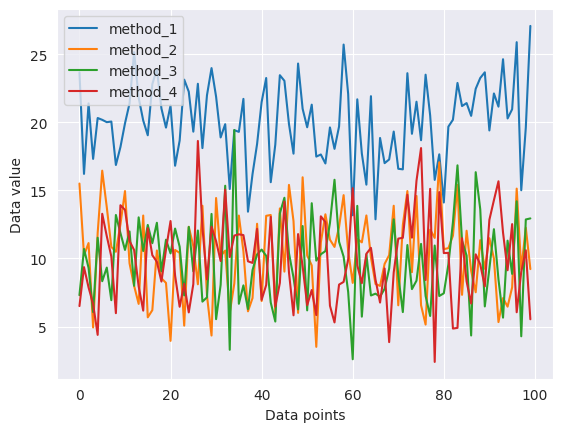

In [32]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

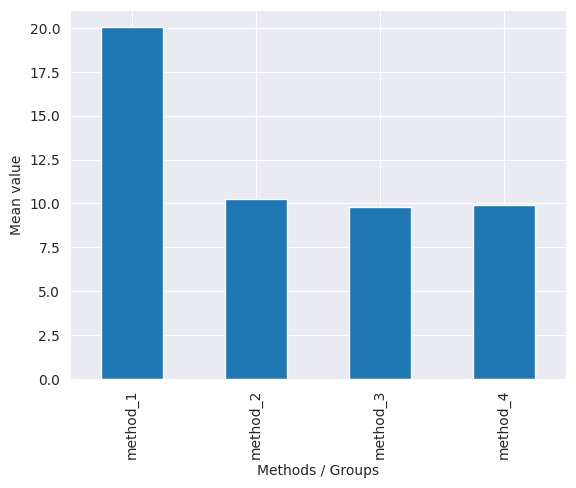

In [33]:
data.mean(axis=0).plot(kind='bar')
plt.xlabel('Methods / Groups')
plt.ylabel('Mean value')
plt.show()

# Limitation of ANOVA

In [9]:
# Alter the mean value of method_4
method_1 = np.random.normal(10,3,10)
method_2 = np.random.normal(11,3,10)
method_3 = np.random.normal(12,3,10)
method_4 = np.random.normal(15,3,10)

data = pd.DataFrame({'method_1':method_1,
                     'method_2':method_2,
                     'method_3':method_3,
                     'method_4':method_4})
data.head()

,method_1,method_2,method_3,method_4
0,9.500201,11.975172,12.606717,21.890598
1,12.751588,10.364261,13.364857,20.065491
2,10.240752,6.359828,10.802195,16.877434
3,10.684716,14.135602,12.543202,10.165909
4,7.358570,14.031126,14.422464,15.180293


In [10]:
df = pd.melt(data,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
1,method_1,12.751588
23,method_3,12.543202
22,method_3,10.802195
2,method_1,10.240752
35,method_4,16.387262
4,method_1,7.358570
5,method_1,10.834387
27,method_3,13.265337
7,method_1,11.888764
6,method_1,9.789530


In [11]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     10.73
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           3.52e-05
Time:                        00:28:54   Log-Likelihood:                -92.074
No. Observations:                  40   AIC:                             192.1
Df Residuals:                      36   BIC:                             198.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.2251      0.806     12.687      0.000       8.590      11.860
C(treatment)[T.method_2]     1.1113      1.140      0.975      0.336      -1.200       3.423
C(treatment)[T.method_3]     2.6340      1.140      2.311      0.027       0.322       4.946
C(treatment)[T.method_4]     6.0657      1.140      5.322      0.000       3.754       8.377
==============================================================================
Omnibus:                        2.962   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                1.805
Skew:                          -0.392   Prob(JB):                        0.406
Kurtosis:                       3.683   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,209.017455,69.672485,10.725566,0.000035
Residual,36.0,233.853342,6.495926,NaN,NaN


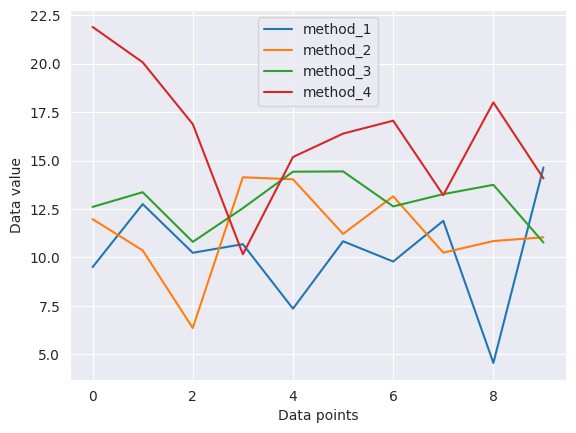

In [13]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

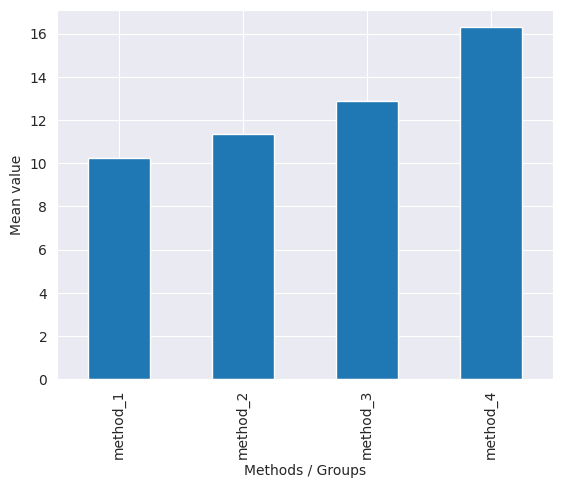

In [14]:
data.mean(axis=0).plot(kind='bar')
plt.xlabel('Methods / Groups')
plt.ylabel('Mean value')
plt.show()

In [40]:
# Alter the mean value of method_4
method_value_1 = np.random.normal(10,3,10)
method_value_2 = np.random.normal(11,3,10)
method_value_3 = np.random.normal(12,3,10)
method_value_4 = np.random.normal(15,3,10)

method_time_1 = np.random.normal(20,3,10)
method_time_2 = np.random.normal(21,3,10)
method_time_3 = np.random.normal(21,3,10)
method_time_4 = np.random.normal(20,3,10)

data_value = pd.DataFrame({'method_1':method_value_1,
                     'method_2':method_value_2,
                     'method_3':method_value_3,
                     'method_4':method_value_4})

In [41]:
df_value = pd.melt(data_value,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df_value.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
47,method_1,17.705275
92,method_1,21.160447
321,method_4,8.746591
127,method_2,13.875288
211,method_3,11.986473
349,method_4,9.433470
116,method_2,6.200987
60,method_1,13.176471
236,method_3,8.024113
365,method_4,8.452690


# Post Hoc Analysis

In [15]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(df['value'], df['treatment'])
tukey = comparison.tukeyhsd(0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
method_1,method_2,1.1113,0.7644,-1.9585,4.1811,False
method_1,method_3,2.634,0.1144,-0.4358,5.7038,False
method_1,method_4,6.0657,0.0,2.9959,9.1355,True
method_2,method_3,1.5226,0.5468,-1.5472,4.5924,False
method_2,method_4,4.9544,0.0006,1.8846,8.0242,True
method_3,method_4,3.4318,0.0234,0.362,6.5015,True


### Thank You for your time!